<h1> Image compression using Singular Value Decomposition (SVD) </h1>

In this notebook, I will perform image compression using the common SVD technique. The function implementation is in the `impro_util.py` script.

Some linear algebra knowledge is assumed in this notebook, such as matrix diagonalization and basic matrix operations.

Note this only works for grayscale images.

In [43]:
# Import statements
import numpy as np
import matplotlib.pyplot as plt
import impro_utils as imp

plt.rcParams.update({'font.size': 40})

<h3> Loading image </h3>

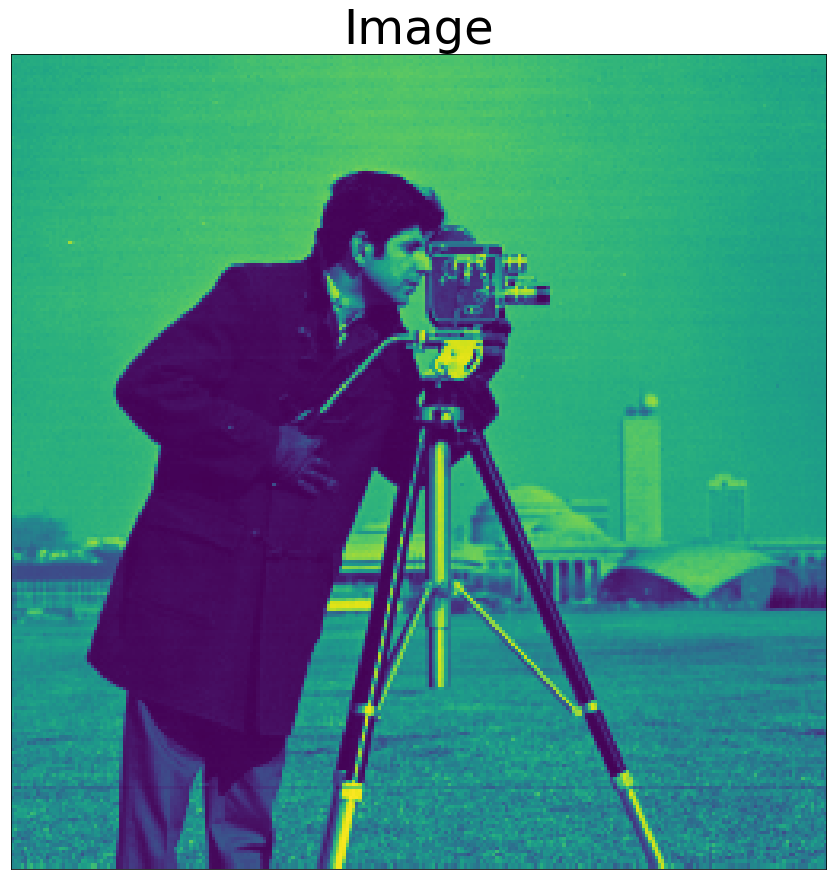

In [44]:
filename = 'images/test2.jpg'
image = imp.load_data(filename)

fig = plt.figure(figsize=(20,15))
imp.plot_img(image, "Image")

<h3> What is Singular Value Decomposition (SVD)? </h3>

Singular Value Decomposition (SVD) is an image compression method that allows us to approximate an entire image with a small amount of information. The goal is to represent the original image with as little information as possible while still retaining a high degree of fidelity (image quality, or losslessness). The mathematical proof is shown below, along with a demonstration.

Given some input matrix $M$, we can represent $M$ in terms of the $U$, $W$ and $V$ matrices as $M = UWV^T$ where

$U$ is the matrix containing the orthonormal eigenvectors of $MM^T$

$W$ is the diagonal matrix containing the square roots of the eigenvalues (the so-called singular values) of $M^TM$

$V^T$ is the matrix containing the orthonormal eigenvectors of $M^TM$

These matrices can be found by performing diagonalization routines, which is not in the scope of this notebook (trivial). Instead, we will use NumPy's `svd` function from its linear algebra library to compute the three matrices.

Python outputs $U$ and $V^T$ as matrices but it returns the singular values in the form of a list, which we can put into a matrix using the `diag` function.

First, let's take a look at the singular values of our image.

Text(0, 0.5, 'Singular Value')

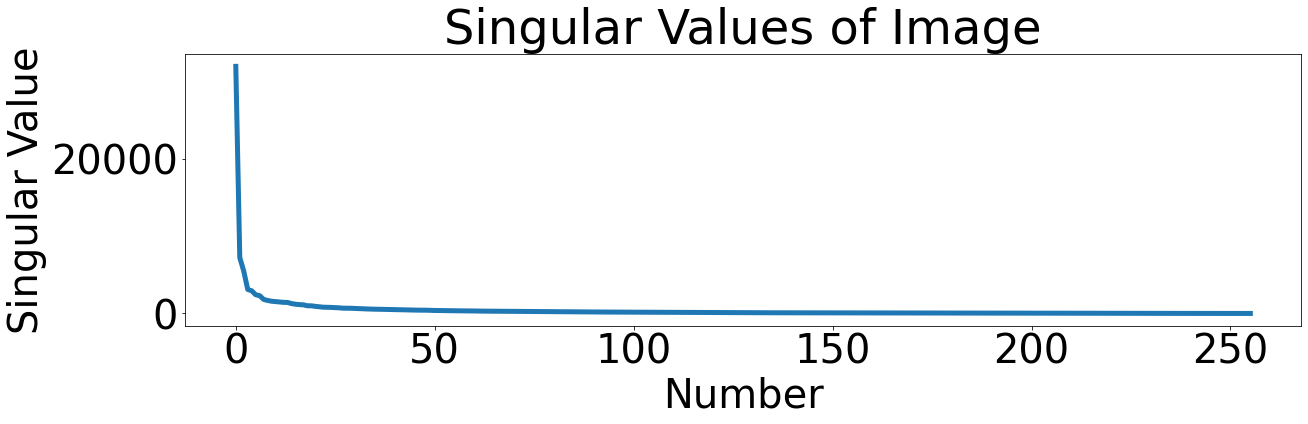

In [45]:
u, s, v = np.linalg.svd(image)

plt.figure(figsize=(20,5))
plt.plot(s, linewidth=5)
plt.title("Singular Values of Image")
plt.xlabel("Number")
plt.ylabel("Singular Value")

According to this plot, it looks like a lot of the singular values are close to zero! Which means we have a lot of unneeded data that we can omit entirely from our image. This is the whole motivation behind compression: why keep all these values (256) when we could just as well reconstruct our image with a fraction of that number!

Therefore, our routine will look something like this:

1. Compute $U$, $W$ and $V^T$
2. Delete singular values in $W$, and the associated eigenvectors in $U$ and $V^T$
3. Reconstruct our image $M$ using $M = UWV^T$

Note that we must delete the values close to zero, which we do by omitting them in the new image array `new_image`.

In [56]:
(width, height) = np.shape(image)

W = np.diag(s)

num_singval = 50

# We want to make sure the number of singular values kept is not 
# greater than the image dimensions
vecnum = min(num_singval, width, height)    

# Here we reconstruct our image following the original equation for M
new_image = u[:,:vecnum] @ W[:vecnum,:vecnum] @ v[:vecnum,:]

<h3> Displaying results </h3>

Shown on the right is the compressed version of the image on the left. Note the image artifacts! Only 50 of the original 256 singular values were used in the compressed image. And yet, we can still make out the original image in the compressed version. This represents an 80.4% decrease in memory used to construct the image!

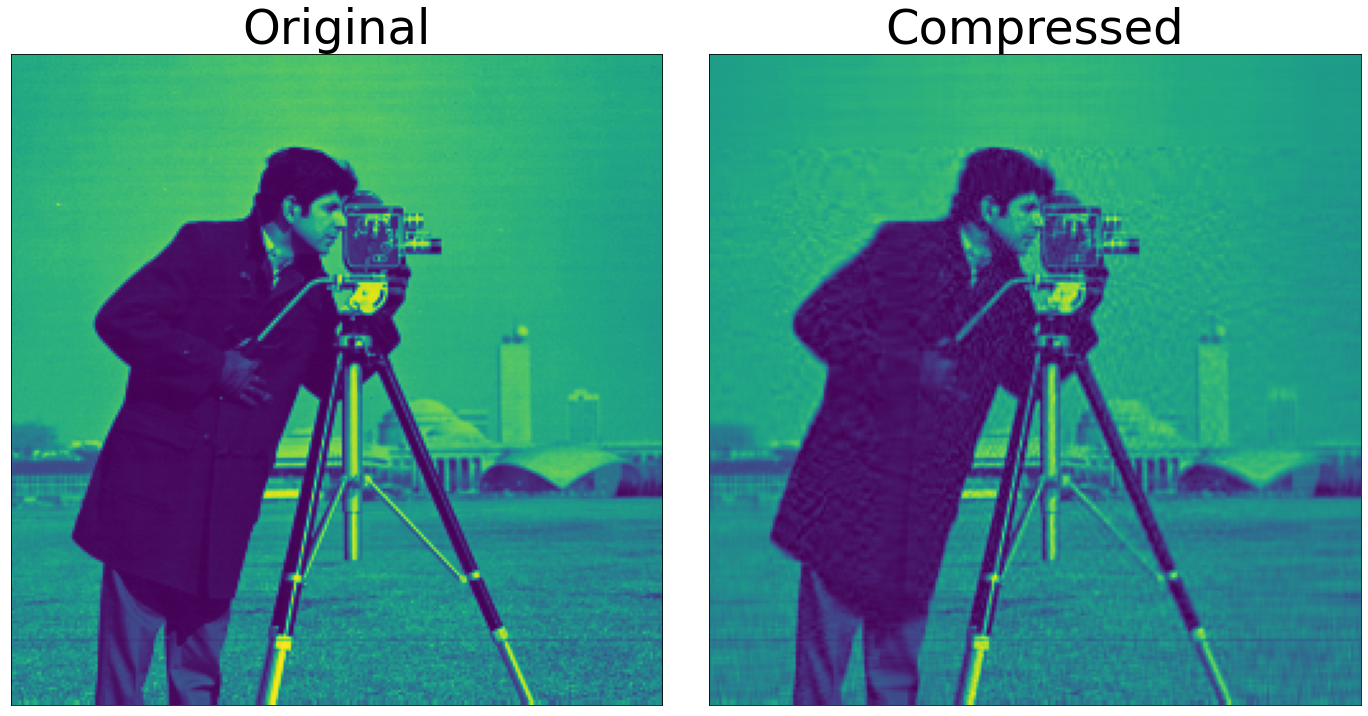

In [ ]:
fig = plt.figure(figsize=(20,15))
plt.subplot(1,2,1)
imp.plot_img(abs(image),'Original')
plt.subplot(1,2,2)
imp.plot_img(abs(new_image),'Compressed')
plt.tight_layout()

<h3> Different levels of compression... </h3>

Experimenting with different numbers of singular values shows just how powerful this technique is for compression.

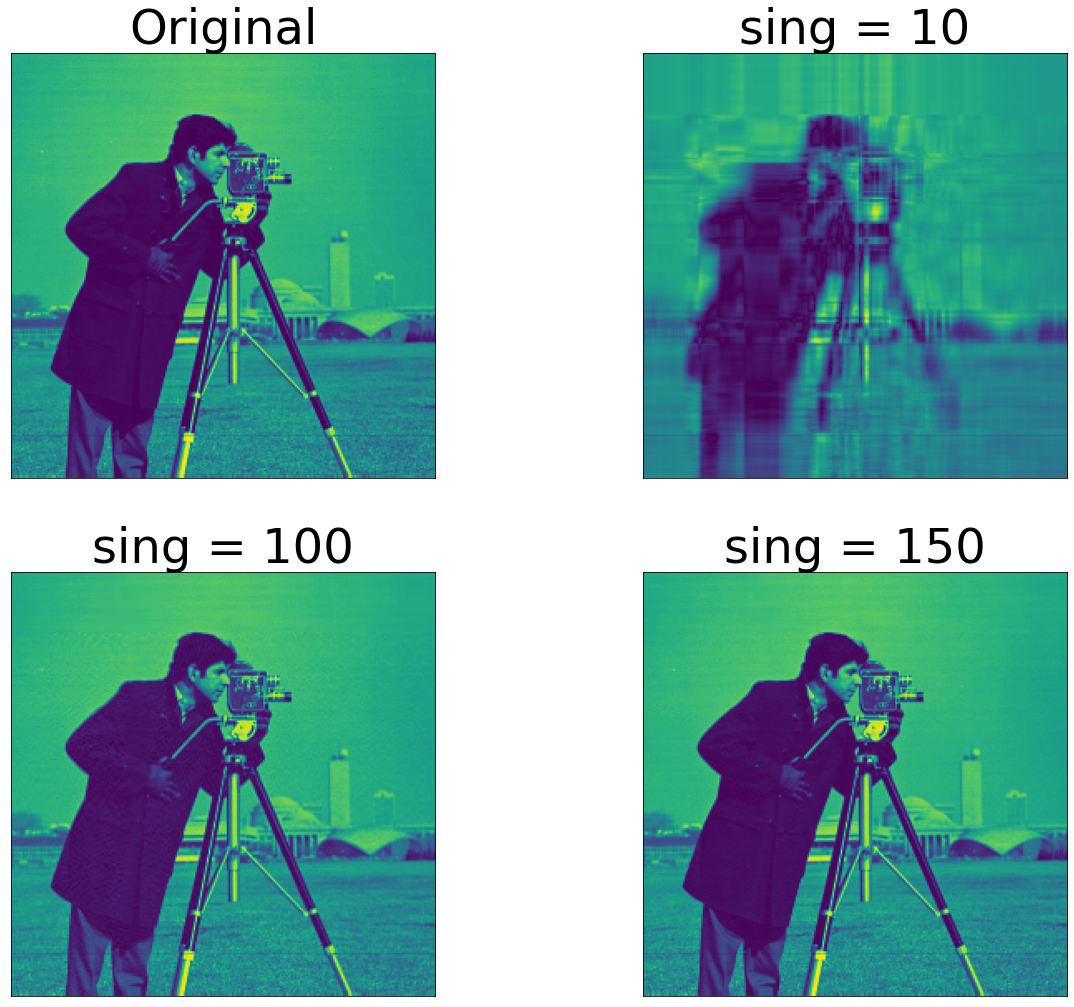

In [55]:
num_1 = 10

num_2 = 100

num_3 = 150

image_1 = u[:,:num_1] @ W[:num_1,:num_1] @ v[:num_1,:]

image_2 = u[:,:num_2] @ W[:num_2,:num_2] @ v[:num_2,:]

image_3 = u[:,:num_3] @ W[:num_3,:num_3] @ v[:num_3,:]

fig = plt.figure(figsize=(20,15))
plt.subplot(2,2,1)
imp.plot_img(abs(image),'Original')
plt.subplot(2,2,2)
imp.plot_img(abs(image_1),'sing = 10')
plt.subplot(2,2,3)
imp.plot_img(abs(image_2),'sing = 100')
plt.subplot(2,2,4)
imp.plot_img(abs(image_3),'sing = 150')
plt.tight_layout()